<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ShuaiGuo16/Univariate_probability_theory"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>
  </td>
</table>

# Univariate Probability Theory
In this notebook, we will review some of the most useful probability concepts and important tools for exploratory data analysis (EDA). Here, we only focus on probability theories applied to a single random variable. This is also known as the *univariate* probability theory. 

In [31]:
# import all packages and set plots to be embedded inline
import numpy as np
import scipy.stats as st
from scipy.integrate import quad
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import pandas as pd

%matplotlib inline
np.set_printoptions(precision=2,suppress=True)

# Import male height dataset (if running locally)
# height = np.genfromtxt('./Dataset/height.csv',delimiter=',')

# Import male height dataset (if running on Colab)
url = 'https://raw.githubusercontent.com/ShuaiGuo16/theory/master/Dataset/height.csv'
height = pd.read_csv(url,names=['Height'])['Height'].to_numpy()

## Table of contents
- [Random variable](#random_variable)
- [Histogram](#histogram)
- [Probability density funcion](#PDF)
    * [Definition](#PDF_definition)
    * [Estimation](#PDF_estimation)
    * [Properties](#PDF_properties)
- [Normal distribution](#normal_distribution)
    * [Mathematical formula](#math)
    * [68-95-99.7 rule](#rule)
    * [Standard normal distribution](#standard)
    * [Z-score](#z_score)
- [Expectation and variance](#EV)
    * [Expectation](#E)
    * [Variance/Standard deviation](#V)
- [Cumulative probability function](#CDF)
    * [Definition](#CDF_definition)
    * [Empirical CDF](#ECDF)
    * [CDF of the standard normal distribution](#CDF_standard)
    * [CDF of general normal distributions](#CDF_general)
- [Quantile function and quantile](#Q)   
    * [Quantile function](#QF)
    * [Box plot](#box_plot)
    * [Q-Q plot](#QQ_plot)
- [Inverse transform sampling](#Inverse) 

## 1. Random variable <a name="random_variable"></a>

A random variable is defined as a variable whose value describes the outcome of a random event. This random event can be:
- flipping a coin, where the corresponding random variable takes a value of either head or tail; 
- Or measuring the height of an adult male, where the corresponding random variable takes a value anywhere between 0.54m (shortest man on earth) and 2.51m (tallest man on earth).

Numpy's `random` module provides methods to generate random numbers.

In [2]:
# Set seed to ensure reproducibility
np.random.seed(42)

# Generate random integers
np.random.randint(1, 10, 10)  #10 random integers in [1,10)

array([7, 4, 8, 5, 7, 3, 7, 8, 5, 4])

In [3]:
# Generate uniform random numbers from [0, 1)
np.random.rand(50)  

array([0.14, 0.65, 0.06, 0.72, 0.94, 0.  , 0.99, 0.62, 0.61, 0.01, 0.02,
       0.52, 0.4 , 0.05, 0.97, 0.23, 0.09, 0.62, 0.38, 0.98, 0.47, 0.86,
       0.68, 0.45, 0.01, 0.94, 0.56, 0.39, 0.02, 0.23, 0.24, 0.68, 0.61,
       0.83, 0.17, 0.39, 0.18, 0.76, 0.43, 0.21, 0.57, 0.03, 0.84, 0.45,
       0.4 , 0.93, 0.73, 0.33, 0.57, 0.52])

In [4]:
# Generate uniform random numbers from [a, b)
a,b = 10,20
(b-a)*np.random.rand(50)+a

array([19.61, 18.45, 17.47, 15.4 , 15.87, 19.65, 16.07, 12.76, 12.96,
       11.65, 10.16, 14.23, 13.95, 12.93, 10.14, 11.99, 17.11, 17.9 ,
       16.06, 19.26, 16.51, 19.15, 18.5 , 14.49, 10.95, 13.71, 16.69,
       16.66, 15.91, 12.75, 15.61, 13.83, 19.72, 18.49, 17.22, 12.36,
       12.56, 10.4 , 17.11, 11.11, 14.39, 12.02, 18.96, 14.75, 15.63,
       16.96, 11.39, 16.04, 15.4 , 12.03])

## 2. Histogram <a name="histogram"></a>
Histogram is an important tool for EDA as it conveniently allows a visualization of the data distribution. To construct a histogram:
1. divide the entire range of data values into a series of equal-sized interval. This step creates the "bins";
2. count how many data points have values within each interval;
3. plot the counts of each interval, which creates a histogram.

In Matplotlib, `matplotlib.pyplot.hist` can generate histogram plots. 

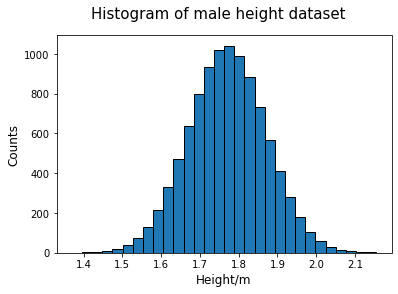

In [32]:
# Histogram of the male height data
fig, ax = plt.subplots()
ax.hist(height,bins=30,edgecolor='black')
fig.suptitle('Histogram of male height dataset', fontsize=15)
ax.set_xlabel('Height/m', fontsize=12)
ax.set_ylabel('Counts', fontsize=12);

The shape of the above histogram resembles a bell curve, as this height dataset comes from a normal distribution.

## 3. Probability density function (PDF) <a name="PDF"></a>

### 3.1 Definition<a name="PDF_definition"></a>
A probability density function $f(x)$ specifies the probability of a random variable's value falling within an infinitesimal interval $[x, x+dx]$ as $f(x)dx$, i.e., 

\begin{equation}
P(x<X<x+dx) = f(x)dx
\end{equation}

The name of *Probability Density Function* contains **probability density**, as it resembles measures probability per unit length, which resembles the concept of mass density in physics. Meanwhile, its name contains **function**, as the probability density values of a random variable will generally be different at different $x$ locations.

### 3.2 Estimation <a name="PDF_estimation"></a>

We can estimate the PDF of the male height using the [**kernel density estimation**](https://en.wikipedia.org/wiki/Kernel_density_estimation) method. The `scipy.stats` module offers a `gaussian_kde` function, which uses Gaussian kernels to estimate the PDF.  

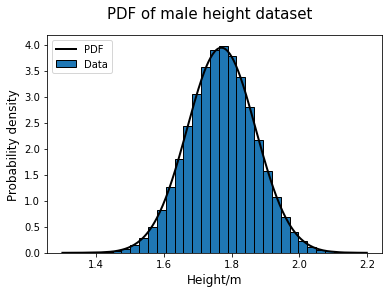

In [6]:
# Estimating the PDF of the male height
fig, ax = plt.subplots()

# Specify the locations for PDF evaluation
kde_xs = np.linspace(1.3, 2.2, 301)

# Perform a kernel density estimate on the data
kde = st.gaussian_kde(height)

# Evaluate and plot PDF values at specified locations
ax.plot(kde_xs, kde.pdf(kde_xs),'k',linewidth=2,label="PDF")

# Histogram of the male height data in density format
ax.hist(height,density=True,bins=30,edgecolor='black',label="Data")

ax.legend(loc="upper left")
fig.suptitle('PDF of male height dataset', fontsize=15)
ax.set_xlabel('Height/m', fontsize=12)
ax.set_ylabel('Probability density', fontsize=12);

### 3.3 Properties<a name="PDF_properties"></a>

For the probability of a random variable falling within the interval $[a,b]$, we can express it as an integral of this random variable's PDF over that range:

\begin{equation}
P(a<X<b) = \int_a^b f(x)dx
\end{equation}

For any PDF, an integral over its entire possible range equals:

\begin{equation}
\int_{x_{min}}^{x_{max}}f(x)dx = P(x_{min} < X < x_{max}) = 1
\end{equation}

This is easy to understand as the probability for the random variable to take a value within its possible range has to be one, i.e., it's bound to happen. In calculus, the integral of a PDF amounts to the area enclosed by the PDF curve and the $x$-axis. As a result, we can visualize the probability in the following way:

<img src="Image/Integral_PDF.jpeg" width=500 height=300 />

## 4. Normal distribution <a name="normal_distribution"></a>

### 4.1 Mathematical formula<a name="math"></a>
Normal distribution is the most important distribution in data science. As we saw in the estimated PDF of the male height dataset, a **bell shape** is the hallmark of a normal distribution. Mathematically, its PDF is written as follows:

\begin{equation}
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}

A normal distribution is governed by two parameters $\mu$ and $\sigma$. $\mu$ is known as the mean, which describes the center location of the distribution. A normal distribution is symmetric about its mean. $\sigma$ is known as the standard deviation, which measures how far the distribution spreads out. The square of standard deviation $\sigma^2$ is the variance.

If a random variable $X$ follows a normal distribution, then we can write:

\begin{equation}
X \sim \mathcal{N}(\mu,\sigma^2)
\end{equation}

In python, we can use `scipy.stats.norm.pdf` to evaluate the PDF values of a normal distribution.

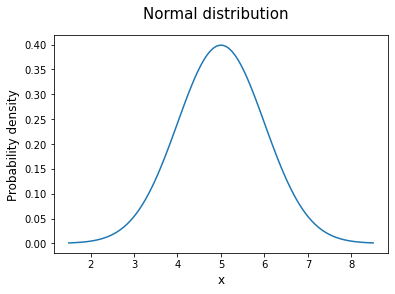

In [7]:
# Specify mean and variance values
mu = 5
variance = 1

# Obtain the corresponding standard deviation values
sigma = np.sqrt(variance)

# Specify plotting range
x = np.linspace(mu-3.5*sigma, mu+3.5*sigma, 100)

fig, ax = plt.subplots()
ax.plot(x, st.norm.pdf(x, mu, sigma))
fig.suptitle('Normal distribution', fontsize=15)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('Probability density', fontsize=12);

We can plot normal PDFs with various $\mu-\sigma$ combinations to assess their impact on the PDF shape.

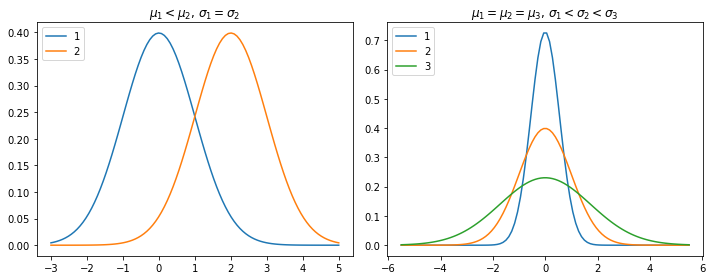

In [8]:
# Specify parameter combinations
mu = np.array([0,2])
variance = np.array([1,0.3,3])
sigma = np.sqrt(variance)

# Normal PDFs under various parameter combinations
fig, axs = plt.subplots(1,2,figsize=(10,4))

# Different mean, same variance
x = np.linspace(-3, 5, 100)
axs[0].plot(x, st.norm.pdf(x, mu[0], sigma[0]),label='1')
axs[0].plot(x, st.norm.pdf(x, mu[1], sigma[0]),label='2')
axs[0].set_title('$\mu_1<\mu_2$, $\sigma_1=\sigma_2$')
axs[0].legend(loc="upper left")

# Same mean, different variance
x = np.linspace(-5.5, 5.5, 100)
axs[1].plot(x, st.norm.pdf(x, mu[0], sigma[1]),label='1')
axs[1].plot(x, st.norm.pdf(x, mu[0], sigma[0]),label='2')
axs[1].plot(x, st.norm.pdf(x, mu[0], sigma[2]),label='3')
axs[1].set_title('$\mu_1=\mu_2=\mu_3$, $\sigma_1<\sigma_2<\sigma_3$')
axs[1].legend(loc="upper left")

fig.tight_layout();

Notice that a PDF with a larger $\sigma$ is wider but lower. This happens because the area under the PDF curve must be 1.

### 4.2 68–95–99.7 rule<a name="rule"></a>

A normal distribution is associated with a so-called **68–95–99.7 rule**. This rule states that the probabilities for a normal random variable to lie within one, two, and, three standard deviations around the mean are 68%, 95%, and 99.7%, respectively.

<img src="Image/Rule.png" width=500 height=300 />

We can demonstrate this rule by using `scipy.integrate` package to integrate a normal PDF over one, two, and three $\sigma$ ranges.

In [9]:
# Specify parameters of a normal distribution
mu, sigma = 5, 1

# Integrate PDF over +/- standard deviation
results,_ = quad(st.norm.pdf, mu-sigma, mu+sigma, args=(mu, sigma))
print(results*100)

68.2689492137086


In [10]:
# Integrate PDF over +/- 2*standard deviation
results,_ = quad(st.norm.pdf, mu-2*sigma, mu+2*sigma, args=(mu, sigma))
print(results*100)

95.44997361036415


In [11]:
# Integrate PDF over +/- 3*standard deviation
results,_ = quad(st.norm.pdf, mu-3*sigma, mu+3*sigma, args=(mu, sigma))
print(results*100)

99.730020393674


### 4.3 Standard normal distribution<a name="standard"></a>
The standard normal distribution is a normal distribution with $\mu=0$ and $\sigma=1$. The corresponding PDF is expressed as:

\begin{equation}
f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}
\end{equation}

We can plot the PDF of the standard normal distribution using `scipy.stats.norm.pdf`.

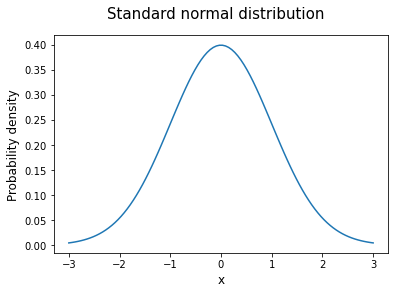

In [12]:
# PDF of the standard normal distribution
x = np.linspace(-3, 3, 100)

fig, ax = plt.subplots()
ax.plot(x, st.norm.pdf(x))
fig.suptitle('Standard normal distribution', fontsize=15)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('Probability density', fontsize=12);

We can convert a normal random variable $X \sim \mathcal{N}(\mu,\sigma^2)$ into a standard normal random variable $Z \sim \mathcal{N}(0,1)$ through the following transformation:

\begin{equation}
Z = \frac{X-\mu}{\sigma}
\end{equation}

This transformation is also known as **standardization**.

Given the connection between $Z \sim \mathcal{N}(0,1)$ and $X \sim \mathcal{N}(\mu,\sigma^2)$, we can easily prove a useful property of the normal distribution: **a linear transformation of a normal random variable is itself a normal random variable.** Here is the proof:

Given a new random variable $Y=aX+b$, where $a$ and $b$ are some constants and $X \sim \mathcal{N}(\mu,\sigma^2)$, we have

\begin{align}
Y &= a(\sigma Z+\mu)+b \\
& =a\sigma Z+(a\mu+b)
\end{align}

Therefore, $Y \sim \mathcal{N}(a\mu+b,a^2\sigma^2)$

### 4.4 Z-score<a name="z_score"></a>

By performing standardization, we are actually computing the $z$-score of each of the data points. In statistics, a $z$-score measures how many standard deviations a value is away from its population mean. It gives more context to the individual data as a data's $z$-score informs us where this data stands relative to the population this data comes from.

Performing $z$-score standardization is a common data preprocessing technique in machine learning. This standardization process transforms features of the input dataset to comparable scales to facilitate better model training. This preprocessing step is also known as **feature scaling**.

## 5. Expectation and variance<a name="EV"></a>

Expectation and variance are two important summary statistics to describe the distribution of a random variable.

### 5.1 Expectation<a name="E"></a>

The expectation is what you would expect the value taken by a random variable on average. It is also known as the *mean* or the *expected value* of the distribution. Given a random variable $X$ and its PDF $f(x)$, the expectation value of $X$ is defined as:

\begin{equation}
E[X] = \int_{-\infty}^{\infty}xf(x)dx
\end{equation}

The expectation is a linear operator:

\begin{equation}
E[aX+b] = aE[X] + b
\end{equation}

For a normal distribution, the mean $\mu$ is the expectation. We can prove that using `scipy.integrate`.

In [13]:
# Compute expectation value of a normal distribution
mu, sigma = 5, 2

f = lambda x, mu, sigma: x*st.norm.pdf(x, mu, sigma)
result,_ = quad(f, -np.inf, np.inf, args=(mu, sigma))

if (np.abs(result-mu)<1e-5):
    print('The computed value matches with the specified mean parameter!')
else:
    print('Double check your integration code!')

The computed value matches with the specified mean parameter!


## 5.2 Variance/Standard deviation<a name="V"></a>

In statistical analysis, the variance is usually adopted as a measure of **uncertainty**. It describes the amount of variability of the random variable $X$ around its expectation $E[X]$. The definition of variance is given as follows:

\begin{equation}
V[X] = E[(X-E[X])^2] = \int_{-\infty}^{\infty} (x-E[X])^2f(x)dx
\end{equation}

Obviously, if $X$ tends to take values that are close to $E[X]$, the corresponding $V[X]$ value will be small, and vice versa.

The square root of the variance $V[X]$ is called the standard deviation of $X$. It is often useful because it has the same unit as $X$.

$V[X]$ can be also expressed as the following:

\begin{equation}
V[X] = E[X^2]-E[X]^2
\end{equation}

Unlike expectation, the variance is not a linear operator:

\begin{equation}
V[aX+b] = a^2V[X]
\end{equation}

For a normal distribution, $\sigma^2$ plays the role of the variance. We can prove that using `scipy.integrate`.

In [14]:
# Compute variance value of a normal distribution
mu, sigma = 5, 2

f = lambda x, mu, sigma: (x-mu)**2*st.norm.pdf(x, mu, sigma)
result,_ = quad(f, -np.inf, np.inf, args=(mu, sigma))

if (np.abs(result-sigma**2)<1e-5):
    print('The computed value matches with the specified variance parameter!')
else:
    print('Double check your integration code!')

The computed value matches with the specified variance parameter!


## 6. Cumulative distribution function<a name="CDF"></a>

### 6.1 Definition <a name="CDF_definition"></a>
The cumulative distribution function (CDF) is another way to describe how possible values of a random variable is distributed. It is defined as the probability that $X$ will take a value less than or equal to $x$:

\begin{equation}
F(X) = P(X \leq x)
\end{equation}

### 6.2 Empirical CDF<a name="ECDF"></a>
Empirical cumulative distribution function, or ECDF in short, is another useful tool in EDA to visualize data distribution. It is called "empirical" as it only estimates the underlying CDF based on the sample data.

To generate ECDF plot, first, we need to sort the data in ascending order; second, for each sorted data value $x_i$, we need to calculate the associated empirical probability $P(X \leq x_i)$, which equals to its sorted index divided by the total number of data. A ECDF plot is generated by plotting the data points' values on the $x$-axis and plotting their corresponding empirical probabilities on the $y$-axis.

The implementation of the ECDF generation procedure is given below:

In [15]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

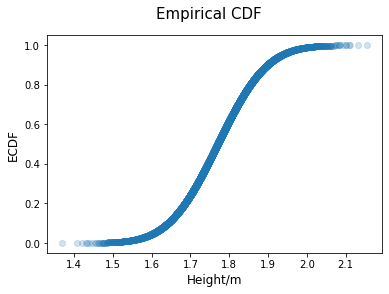

In [16]:
# ECDF of the male height dataset
height_smallsize = height[:1000]
x,y = ecdf(height)
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.2)
fig.suptitle('Empirical CDF', fontsize=15)
ax.set_xlabel('Height/m', fontsize=12)
ax.set_ylabel('ECDF', fontsize=12);

Alternatively, we can use `seaborn.ecdf` to generate ECDF plot.

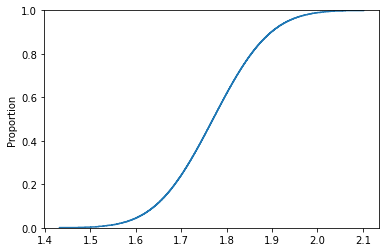

In [17]:
height_smallsize = height[:1000]
fig, ax = plt.subplots()
sns.ecdfplot(height_smallsize,ax=ax);

### 6.3 CDF of the standard normal distribution <a name="CDF_standard"></a>
We denote the $\Phi(x)$ as the CDF of the standard normal distribution:

\begin{equation}
\Phi(x) = P(Z \leq x) = \int_{-\infty}^{x} \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}}dz
\end{equation}

We can use `scipy.stats.norm.cdf` to evaluate $\Phi(x)$

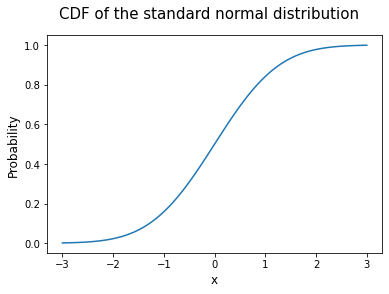

In [18]:
# CDF of the standard normal distribution
x = np.linspace(-3, 3, 100)

fig, ax = plt.subplots()
ax.plot(x, st.norm.cdf(x))
fig.suptitle('CDF of the standard normal distribution', fontsize=15)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('Probability', fontsize=12);

There are two properties associated with $\Phi(x)$:
- $\Phi(0) = 0.5$
- $\Phi(-x) = 1-\Phi(x)$

We demonstrate those properties in the following:

In [19]:
# The first property
st.norm.cdf(0)

0.5

In [20]:
# The second property
x = 1
st.norm.cdf(-1) - (1-st.norm.cdf(x))

0.0

### 6.3 CDF of the standard normal distribution <a name="CDF_general"></a>

For a general normal distribution $X \sim \mathcal{N}(\mu,\sigma^2)$, we know $X=\sigma Z+\mu$. Therefore, we can write

\begin{align}
F(x) &= P(X \leq x) = P(\sigma Z+\mu \leq x) \\
& = P(Z \leq \frac{X-\mu}{\sigma}) \\
& = \Phi(\frac{X-\mu}{\sigma})
\end{align}

This allows us to write out the CDF of any normal distribution in the form of $\Phi(x)$.

To calculate CDF of any normal distribution, we only need to supply `scipy.stats.norm.cdf` with specific mean and standard deviation values. For the previous male height dataset, its $\mu=1.77$ and $\sigma=0.1$.

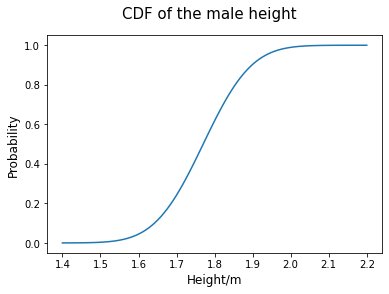

In [21]:
# CDF plot of the male height dataset
height_smallsize = height[:1000]
x = np.linspace(1.4, 2.2, 100)

fig, ax = plt.subplots()
ax.plot(x, st.norm.cdf(x,loc=1.77,scale=0.1))         # Scale refers to standard deviation
fig.suptitle('CDF of the male height', fontsize=15)
ax.set_xlabel('Height/m', fontsize=12)
ax.set_ylabel('Probability', fontsize=12);

Notice that this figure matches perfectly with the ECDF we plotted earlier.

We can also assess the impact of $\mu$ and $\sigma$ values on the shape of the CDF of the normal distribution.

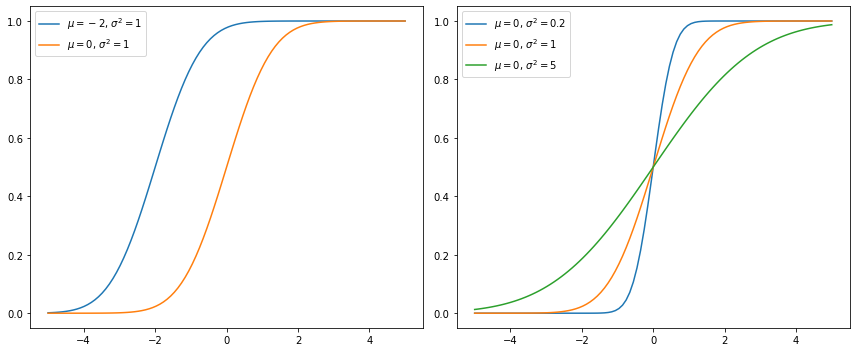

In [22]:
# Specify parameter combinations
mu = np.array([-2,0])
variance = np.array([0.2,1,5])
sigma = np.sqrt(variance)

# Normal PDFs under various parameter combinations
fig, axs = plt.subplots(1,2,figsize=(12,5))

# Different mean, same standard deviation
x = np.linspace(-5, 5, 100)
axs[0].plot(x, st.norm.cdf(x, mu[0], sigma[1]),label='$\mu=-2$, $\sigma^2=1$')
axs[0].plot(x, st.norm.cdf(x, mu[1], sigma[1]),label='$\mu=0$, $\sigma^2=1$')
axs[0].legend(loc="upper left")


# Same mean, different standard deviation
x = np.linspace(-5, 5, 100)
axs[1].plot(x, st.norm.cdf(x, mu[1], sigma[0]),label='$\mu=0$, $\sigma^2=0.2$')
axs[1].plot(x, st.norm.cdf(x, mu[1], sigma[1]),label='$\mu=0$, $\sigma^2=1$')
axs[1].plot(x, st.norm.cdf(x, mu[1], sigma[2]),label='$\mu=0$, $\sigma^2=5$')
axs[1].legend(loc="upper left")

fig.tight_layout();

## 7. Quantile function and quantiles<a name="Q"></a>

### 7.1 Quantile function <a name="QF"></a>

Another important probability concept related to the CDF is the *quantile function*. **Essentially, a quantile function is the inverse of the corresponding CDF.** A quantile function $Q(\alpha)$ accepts a probability value $\alpha$ ($0 \leq \alpha \leq 1$) as the input and finds the value $x_{\alpha}$ such that $P(X \leq x_{\alpha})=\alpha$. A visual demonstration of the relationship between a CDF and its corresponding quantile function is given below.

<img src="Image/Quantile_function.png" width=450 height=250 />

For normal distributions, we can use `ppf` method from `scipy.stats.norm` to calculate the quantile function. 

In [23]:
# Specify mean and standard deviation
mu, sigma = 1, 1

# Specify quantile
alpha = 0.5

# Calculate the correspoding quantile function
st.norm.ppf(0.5, loc=mu, scale=sigma)

1.0

### 7.2 Box-plot<a name="box_plot"></a>

Box plot is another powerful tool in EDA. It describes the dataset using five summary statistics. A breakdown of the boxplot is shown below.

<img src="Image/Box_plot.png" width=450 height=250 />

In `Matplotlib`, we can use `boxplot` function to generate box plot.

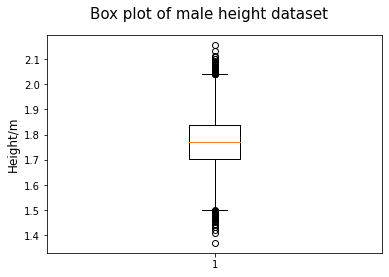

In [24]:
# Box plot of the male height dataset
fig, ax = plt.subplots()

ax.boxplot(height)
ax.set_ylabel('Height/m',fontsize=12);
fig.suptitle('Box plot of male height dataset',fontsize=15);

### 7.3 Q-Q plot<a name="QQ_plot"></a>

The Q-Q plot is an effective EDA tool to assess whether the sample data is normally distributed. It works by plotting the quantiles of the sample data and the standard normal distribution against each other. If the data came from a normal distribution, we should see the points forming a line that's roughly straight.

Similar to $Q_1$, $Q_2$, and $Q_3$ that creates four equal-probable intervals, if the dataset contains $N$ samples, we can create $N$+1 equal-probable intervals, where the $N$ data points act as the quantiles. Subsequently, we can divide the standard normal distribution also into $N$+1 equal-probable intervals, which would give us the corresponding $N$ quantiles. By plotting the re-ordered sample data on the $y$-axis and their corresponding quantiles of the standard normal distribution on the $x$-axis, we obtain the Q-Q plot.

`statsmodels` offers `qqplot` function, which can be used to generate Q-Q plot of the dataset. In the following, we will draw the Q-Q plot of the male height dataset.

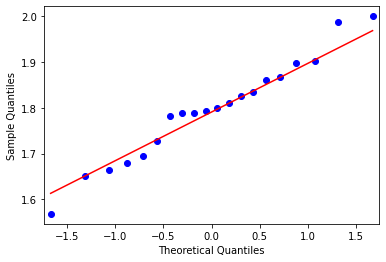

In [25]:
# Slice the data
height_smallsize = height[:20]

# Q-Q plot
fig, ax = plt.subplots()
sm.qqplot(height_smallsize, line='q', ax=ax);

We can clearly see that the points in the Q-Q plot approximately lie on a line, indicating that the sample data is normally distributed. 

As a comparison, we can generate the Q-Q plot of a dataset coming from a uniform distribution. 

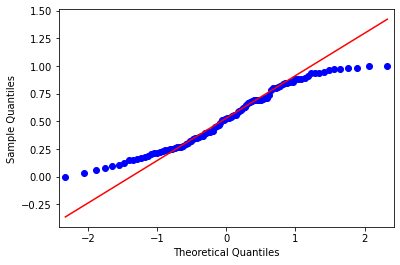

In [26]:
# Generate some fake data from a uniform distribution
uniform_data = np.random.rand(100)

# Q-Q plot
fig, ax = plt.subplots()
sm.qqplot(uniform_data, line='q', ax=ax);

## 8. Inverse transform sampling<a name="Inverse"></a>

Inverse transform sampling is a simple algorithm to generate random samples from any given CDF. To pull it off, we need to know the target CDF and we need a random number generator. This technique builds on a simple yet powerful theorem:

> For any random variable $X$, its CDF $F(x)$ has a uniform distribution on [0 1].

This theorem tells us, if we can generate random samples $u_i$ on [0 1], and for each sample $u_i$, we apply the quantile function $Q(u_i)$ —which is the inverse of the specified CDF— to find the corresponding $x_i=Q(u_i)$, then $x_i$ would be the samples following our specified CDF.



To see how this method works in practice, we will generate samples from the standard normal distribution. Imagine that a standard normal random number generator is not readily available. However, we do have a uniform random number generator, and we do know the CDF of the standard normal distribution. In this situation, we could resort to inverse transform sampling to complete the task.

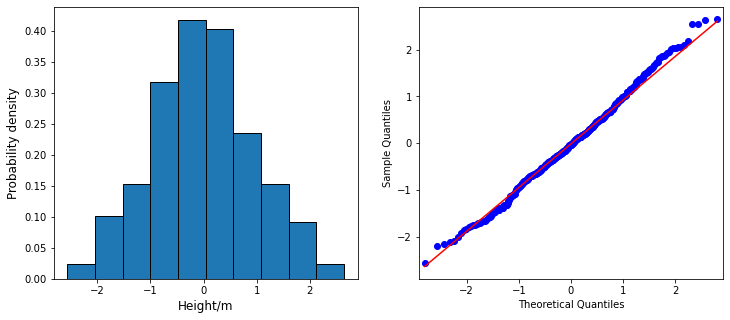

In [27]:
# Generate uniform random numbers from [0,1]
uniform_data = np.random.rand(400)

# Calculate inverse CDF 
target_samples = st.norm.ppf(uniform_data)

# Post-processing samples
fig, axs = plt.subplots(1,2,figsize=(12,5))

# Histogram of the generated samples
axs[0].hist(target_samples,density=True,bins=10,edgecolor='black')
axs[0].set_xlabel('Height/m', fontsize=12)
axs[0].set_ylabel('Probability density', fontsize=12);

# Q-Q plot of the generated samples
sm.qqplot(target_samples, line='q', ax=axs[1]);

The Q-Q plot on the right comfirms that the generated samples are indeed following a normal distribution.

Of course, the simple case study we discussed above is only for the demonstration purpose. In reality, `numpy.random.normal` can be used to draw random samples from a normal distribution.

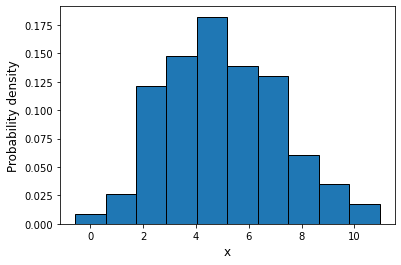

In [32]:
# Draw normal random samples
normal_samples = np.random.normal(5, 2,100)

fig, ax = plt.subplots()
ax.hist(normal_samples, bins=10, density=True, edgecolor='black')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('Probability density', fontsize=12);